In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/MP 1B/Maternal Health Risk Data Set.csv')

df.rename(columns={'Age': 'Umur', 'SystolicBP': 'Tekanan Darah Sistolik', 'DiastolicBP': 'Tekanan Darah Diastolik', 'BS': 'Gula Darah', 'BodyTemp': 'Suhu Tubuh', 'HeartRate': 'Denyut Jantung', 'RiskLevel': 'Tingkat Resiko'}, inplace=True)
df

,Umur,Tekanan Darah Sistolik,Tekanan Darah Diastolik,Gula Darah,Suhu Tubuh,Denyut Jantung,Tingkat Resiko
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


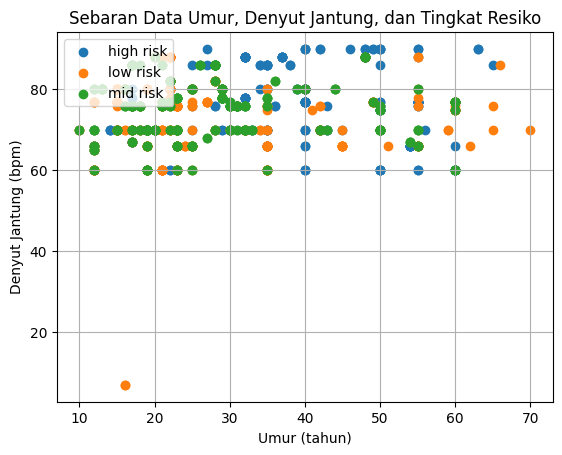

In [6]:
#VISUALISASI DATA
#untuk membuat scatter plot untuk memvisualisasikan hubungan antara Umur, Denyut Jantung, dan Tingkat Resiko dalam data.
#Setiap kelompok tingkat risiko ditampilkan dengan warna berbeda, membantu memahami pola atau perbedaan di antara kelompok tersebut.

import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for tingkat_resiko, d in df.groupby('Tingkat Resiko'):
    ax.scatter(d['Umur'], d['Denyut Jantung'], label=tingkat_resiko)


plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Denyut Jantung, dan Tingkat Resiko')
plt.xlabel('Umur (tahun)')
plt.ylabel('Denyut Jantung (bpm)')
plt.grid(True)
plt.show()

In [41]:
#PREPROCESSING DATASET

import numpy as np

X_train = np.array(df[['Umur', 'Denyut Jantung']])
y_train = np.array(df['Tingkat Resiko'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

#untuk menyiapkan data pelatihan (training data) dengan memisahkan fitur (features) dan target (label) dari DataFrame df menggunakan NumPy.
#X_train: Menyimpan data input (fitur) seperti Umur dan Denyut Jantung.
#y_train: Menyimpan data output (target) seperti Tingkat Resiko.


X_train:
[[25 86]
 [35 70]
 [29 80]
 ...
 [35 86]
 [43 70]
 [32 76]]

y_train: ['high risk' 'high risk' 'high risk' ... 'high risk' 'high risk'
 'mid risk']


In [43]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

#menggunakan LabelBinarizer dari pustaka scikit-learn untuk mengubah data target (y_train) menjadi bentuk one-hot encoding

y_train:
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [9]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

#untuk "meratakan" array y_train dari bentuk 2D menjadi 1D menggunakan metode .flatten().

y_train: [1 0 0 ... 0 0 1]


In [30]:
#PREPROCESSING DATASET

import numpy as np

X_train = np.array(df[['Umur', 'Denyut Jantung']])
y_train = np.array(df['Tingkat Resiko'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

# ---CHANGE START---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(f'y_train:\n{y_train}')
# ---CHANGE END---

# TRAINING KKN CLASSIFICATION MODEL

from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)

y_train_encoded = y_train

model.fit(X_train, y_train_encoded)

#Data fitur dan target dikonversi menjadi array NumPy.Target (label) dikonversi menjadi angka menggunakan LabelEncoder(prepocessing)
#Algoritma KNN dengan K=3 dilatih menggunakan data yang telah diproses(training label)


X_train:
[[25 86]
 [35 70]
 [29 80]
 ...
 [35 86]
 [43 70]
 [32 76]]

y_train: ['high risk' 'high risk' 'high risk' ... 'high risk' 'high risk'
 'mid risk']
y_train:
[0 0 0 ... 0 0 2]


KNeighborsClassifier(n_neighbors=3)

In [12]:
#PREDIKSI TINGKAT RESIKO
import numpy as np

umur = 25
denyut_jantung = 80

# Menyusun data input menjadi array sesuai dengan fitur yang digunakan
X_new = np.array([umur, denyut_jantung]).reshape(1, -1)
print(X_new)

#untuk menyusun data baru yang akan diprediksi tingkat risikonya oleh model KNN

[[25 80]]


In [13]:
y_new = model.predict(X_new)
print(y_new)

# Assuming 'le' is your LabelEncoder from previous cells
predicted_label = le.inverse_transform(y_new)
print(predicted_label)
#untuk memprediksi tingkat risiko berdasarkan data input yang sudah dipersiapkan,
#kemudian mengubah hasil prediksi dari format numerik kembali menjadi label kategori asli menggunakan LabelEncoder

[0]
['high risk']


In [14]:
decoded_prediction = le.inverse_transform(y_new)
print(decoded_prediction)

#decoded_prediction berisi label asli setelah hasil prediksi numerik diubah kembali menjadi kategori yang dimengerti manusia,
#berkat fungsi inverse_transform dari LabelEncoder.







['high risk']


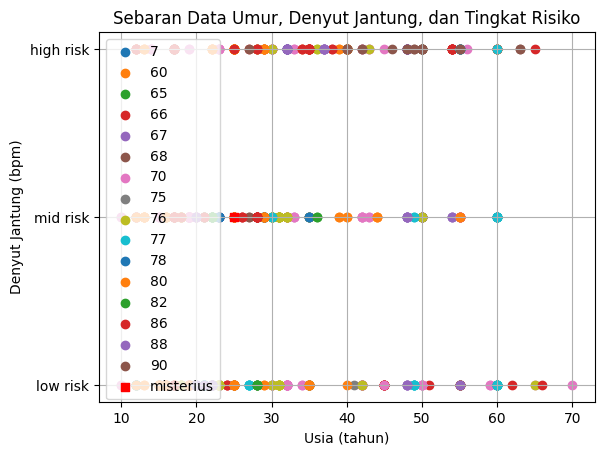

In [15]:
#VISUALISASI NEAREST NEIGHBOURS

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for denyut_jantung, d in df.groupby('Denyut Jantung'):
    ax.scatter(d['Umur'], d['Tingkat Resiko'], label=denyut_jantung)

plt.scatter(umur, tingkat_resiko,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Denyut Jantung, dan Tingkat Risiko')
plt.xlabel('Usia (tahun)')
plt.ylabel('Denyut Jantung (bpm)')
plt.grid(True)
plt.show()

#membuat  scatter plot yang menunjukkan hubungan antara Umur, Denyut Jantung, dan Tingkat Resiko.
#Selain itu, ada penambahan untuk memvisualisasikan titik yang dianggap "misterius" dengan cara menyorot titik tertentu di grafik.

In [16]:
#KALKULASI DISTANCE (EUCLIDEAN DISTANCE)

misterius = np.array([umur, tingkat_resiko])
misterius

#cara mendefinisikan titik "misterius" dengan data umur dan tingkat risiko dalam format array NumPy.

array(['25', 'mid risk'], dtype='<U21')

In [17]:
X_train
#array yang berisi fitur dari dataset yang digunakan untuk melatih model

array([[25, 86],
       [35, 70],
       [29, 80],
       ...,
       [35, 86],
       [43, 70],
       [32, 76]])

In [20]:

import numpy as np
from scipy.spatial.distance import euclidean

# Assuming 'umur' and 'denyut_jantung' are defined as before
misterius = np.array([umur, denyut_jantung])

# Calculate distances
data_jarak = [euclidean(misterius, d) for d in X_train]

print(data_jarak)

#enghitung jarak Euclidean antara titik misterius (misterius)
#dan setiap titik dalam X_train menggunakan fungsi euclidean dari scipy.spatial.distance



[4.0, 22.360679774997898, 10.770329614269007, 20.615528128088304, 17.204650534085253, 20.09975124224178, 12.165525060596439, 10.770329614269007, 21.18962010041709, 26.248809496813376, 14.142135623730951, 20.8806130178211, 13.0, 20.615528128088304, 23.08679276123039, 22.360679774997898, 25.0, 10.0, 14.866068747318506, 25.0, 15.0, 32.01562118716424, 14.560219778561036, 21.18962010041709, 14.560219778561036, 13.45362404707371, 24.73863375370596, 20.223748416156685, 27.294688127912362, 8.54400374531753, 5.385164807134504, 24.08318915758459, 8.54400374531753, 13.601470508735444, 20.396078054371138, 32.69556544854363, 38.07886552931954, 38.41874542459709, 31.240998703626616, 26.0, 3.605551275463989, 30.066592756745816, 10.0, 20.615528128088304, 20.09975124224178, 21.18962010041709, 26.248809496813376, 14.142135623730951, 16.401219466856727, 22.360679774997898, 24.0, 10.44030650891055, 31.622776601683793, 30.59411708155671, 37.33630940518894, 20.09975124224178, 21.18962010041709, 26.248809496

In [22]:
import pandas as pd

# Assuming 'df' is your original DataFrame and 'data_jarak' is calculated
df['jarak'] = data_jarak  # Add 'jarak' column to your original DataFrame
sorted_df = df.sort_values(['jarak']) #sort it by jarak

print(sorted_df)

#menambahkan kolom jarak ke DataFrame df
#kemudian mengurutkan DataFrame berdasarkan nilai dalam kolom jarak.

     Umur  Tekanan Darah Sistolik  Tekanan Darah Diastolik  Gula Darah  \
657    27                     140                       90        15.0   
40     22                     120                       85         6.1   
188    22                     120                       85         6.1   
379    22                     120                       85         7.8   
945    22                     120                       85         7.5   
..    ...                     ...                      ...         ...   
372    60                     120                       85        15.0   
553    60                     120                       85        15.0   
338    70                      85                       60         6.9   
908    16                     120                       75         7.9   
499    16                     120                       75         7.9   

     Suhu Tubuh  Denyut Jantung Tingkat Resiko      jarak  
657        98.0              90      high risk   2.

In [31]:
# EVALUASI KNN CLASSIFICATION MODEL

#Testing set
X_test = np.array([[27, 65], [60, 70]])
y_test = lb.transform(np.array(['90', '88', '60', '70'])).flatten()

print(f'X_test: \n{X_test}\n')
print(f'y_test: \n{y_test}')

#mendefinisikan data uji (X_test dan y_test) yang akan digunakan untuk mengevaluasi model KNN

X_test: 
[[27 65]
 [60 70]]

y_test: 
[0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
# EVALUASI KNN CLASSIFICATION MODEL

#Prediksi terhadap Testing set
y_pred = model.predict(X_test)
y_pred

array([1, 1])

In [35]:
# EVALUASI KNN CLASSIFICATION MODEL
#Accuracy

#Testing set
X_test = np.array([[27, 65], [60, 70]])
# The original y_test assignment was incorrect
# y_test = lb.transform(np.array(['90', '88', '60', '70'])).flatten()
# Assuming you want to test with labels corresponding to the two data points in X_test
# We need to provide two labels that match the possible encoded values
y_test = np.array([1, 0]) # Example: Assuming 1 and 0 are possible encoded labels

print(f'X_test: \n{X_test}\n')
print(f'y_test: \n{y_test}')

#Prediksi terhadap Testing set
y_pred = model.predict(X_test)

# Ensure that the number of elements in y_test and y_pred is the same for accuracy calculation
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print (f'Accuracy: {acc}')

X_test: 
[[27 65]
 [60 70]]

y_test: 
[1 0]
Accuracy: 0.5


In [36]:
#PRECISSION

from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precision: {prec}')

Precision: 0.5


In [37]:
#RECALL

from sklearn.metrics import recall_score
rec = recall_score (y_test, y_pred)
print(f'Recall: {rec}')

Recall: 1.0


In [38]:
#F1 SCORE

from sklearn.metrics import f1_score
f1 = f1_score (y_test, y_pred)
print (f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [39]:
#CLASSIFICATION REPORT

from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
#MATTHEWS CORRELATION COEFFICIENT (MCC)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.0
